In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import markdown

### real estate data

In [ ]:
properties_1 = pd.read_excel('untidy_Montreal_property_listings.xlsx')
properties_1.head()

FileNotFoundError: ignored

#### Manage some nulls in the price and address fields

In [ ]:
properties_1.isna().sum()

price             78
region            78
address           83
bedrooms          78
bathrooms         95
living area      131
lot_dimension    733
Latitude           0
Longitude          0
dtype: int64

In [ ]:
properties_1.shape

(925, 9)

### The dataset has 78 null rows that we will remove

In [ ]:
properties_1[properties_1['price'].isnull()]

price region address bedrooms bathrooms living area lot_dimension  \
3     NaN    NaN     NaN      NaN       NaN         NaN           NaN   
15    NaN    NaN     NaN      NaN       NaN         NaN           NaN   
27    NaN    NaN     NaN      NaN       NaN         NaN           NaN   
39    NaN    NaN     NaN      NaN       NaN         NaN           NaN   
51    NaN    NaN     NaN      NaN       NaN         NaN           NaN   
..    ...    ...     ...      ...       ...         ...           ...   
879   NaN    NaN     NaN      NaN       NaN         NaN           NaN   
891   NaN    NaN     NaN      NaN       NaN         NaN           NaN   
903   NaN    NaN     NaN      NaN       NaN         NaN           NaN   
915   NaN    NaN     NaN      NaN       NaN         NaN           NaN   
924   NaN    NaN     NaN      NaN       NaN         NaN           NaN   

      Latitude  Longitude  
3    45.515334 -73.682818  
15   45.515334 -73.682818  
27   45.515334 -73.682818  
39   45.515334 -73.682818  
51   45.515334 -73.682818  
..         ...        ...  
879  45.515334 -73.682818  
891  45.515334 -73.682818  
903  45.515334 -73.682818  
915  45.515334 -73.682818  
924  45.494469 -73.564542  

[78 rows x 9 columns]

In [ ]:
#null addresses
no_null_price = properties_1.copy()
no_null_price.dropna(subset=['price'], inplace=True)
no_null_price.head()

price                                 region  \
0  $849,000      Mercier / Hochelaga / Maisonneuve   
1  $420,000  Villeray / St-Michel / Parc-Extension   
2  $810,000  Villeray / St-Michel / Parc-Extension   
4  $699,000     Pointe-Aux-Trembles / Montréal-Est   
5  $349,000            Rosemont / La Petite Patrie   

                                  address                 bedrooms  \
0                5185-5187 RUE DESMARTEAU  Bedrooms\n            3   
1                 417-8635 RUE LAJEUNESSE  Bedrooms\n            2   
2  8517-A-8515-8517 avenue de l'esplanade  Bedrooms\n            8   
4                          11901 Victoria  Bedrooms\n            3   
5                         5919 rue Chabot  Bedrooms\n            1   

                               bathrooms  \
0  Bathrooms + Half baths\n            1   
1  Bathrooms + Half baths\n            1   
2  Bathrooms + Half baths\n            3   
4  Bathrooms + Half baths\n            1   
5  Bathrooms + Half baths\n            1   

                                    living area lot_dimension   Latitude  \
0                     Lot dimensions\n2,176 ft²           NaN  45.609226   
1  Living space area (basement exclu.)\n957 ft²           NaN  45.546245   
2                     Lot dimensions\n2,850 ft²           NaN  45.538018   
4                     Lot dimensions\n3,060 ft²           NaN  45.638808   
5  Living space area (basement exclu.)\n537 ft²           NaN  45.542159   

   Longitude  
0 -73.533193  
1 -73.636030  
2 -73.639644  
4 -73.493559  
5 -73.590741

In [ ]:
null_address = no_null_price[no_null_price['address'].isnull()]
#no_null_price[no_null_price['address'].isnull()]
null_address

price  \
82   $545,000\n\n\n\n\n\n\n\n\n                    ...   
192  $399,000\n\n\n\n\n\n\n\n\n                    ...   
280  $500,000\n\n\n\n\n\n\n\n\n                    ...   
395  $440,000\n\n\n\n\n\n\n\n\n                    ...   
515  $359,000\n\n\n\n\n\n\n\n\n                    ...   

                                    region address                 bedrooms  \
82         L'île-Bizard / Sainte-Geneviève     NaN  Bedrooms\n            3   
192  Villeray / St-Michel / Parc-Extension     NaN  Bedrooms\n            2   
280                  Pierrefonds / Roxboro     NaN  Bedrooms\n            4   
395            Rosemont / La Petite Patrie     NaN  Bedrooms\n            2   
515                                Lachine     NaN  Bedrooms\n            2   

                                             bathrooms  \
82   Bathrooms + Half baths\n            1\n       ...   
192              Bathrooms + Half baths\n            1   
280              Bathrooms + Half baths\n            2   
395              Bathrooms + Half baths\n            1   
515              Bathrooms + Half baths\n            1   

                                        living area  \
82   Living space area (basement exclu.)\n1,275 ft²   
192    Living space area (basement exclu.)\n703 ft²   
280    Living space area (basement exclu.)\n965 ft²   
395    Living space area (basement exclu.)\n840 ft²   
515    Living space area (basement exclu.)\n915 ft²   

                 lot_dimension   Latitude  Longitude  
82   Lot dimensions\n5,046 ft²  45.501887 -73.567392  
192                        NaN  45.501887 -73.567392  
280  Lot dimensions\n4,895 ft²  45.501887 -73.567392  
395  Lot dimensions\n1,140 ft²  45.501887 -73.567392  
515                        NaN  45.501887 -73.567392

#### For these rows, will estimate coordinates based on the 'region' attribute

In [ ]:
estimations = pd.read_csv('Missing_addreses_estimations.csv')
estimations

Address   Latitude  Longitude
0        L'île-Bizard / Sainte-Geneviève  45.494889 -73.890756
1  Villeray / St-Michel / Parc-Extension  45.527949 -73.630379
2                  Pierrefonds / Roxboro  45.482163 -73.862159
3            Rosemont / La Petite Patrie  45.560857 -73.573891
4                                Lachine  45.441909 -73.692544

In [ ]:
#drop the current Longitude and Latitude which are just the center of Mtl
null_address.drop(['Latitude','Longitude'], axis=1, inplace=True)

C:\Users\azale\AppData\Local\Temp\ipykernel_15620\4219564939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_address.drop(['Latitude','Longitude'], axis=1, inplace=True)


In [ ]:
null_address

price  \
82   $545,000\n\n\n\n\n\n\n\n\n                    ...   
192  $399,000\n\n\n\n\n\n\n\n\n                    ...   
280  $500,000\n\n\n\n\n\n\n\n\n                    ...   
395  $440,000\n\n\n\n\n\n\n\n\n                    ...   
515  $359,000\n\n\n\n\n\n\n\n\n                    ...   

                                    region address                 bedrooms  \
82         L'île-Bizard / Sainte-Geneviève     NaN  Bedrooms\n            3   
192  Villeray / St-Michel / Parc-Extension     NaN  Bedrooms\n            2   
280                  Pierrefonds / Roxboro     NaN  Bedrooms\n            4   
395            Rosemont / La Petite Patrie     NaN  Bedrooms\n            2   
515                                Lachine     NaN  Bedrooms\n            2   

                                             bathrooms  \
82   Bathrooms + Half baths\n            1\n       ...   
192              Bathrooms + Half baths\n            1   
280              Bathrooms + Half baths\n            2   
395              Bathrooms + Half baths\n            1   
515              Bathrooms + Half baths\n            1   

                                        living area              lot_dimension  
82   Living space area (basement exclu.)\n1,275 ft²  Lot dimensions\n5,046 ft²  
192    Living space area (basement exclu.)\n703 ft²                        NaN  
280    Living space area (basement exclu.)\n965 ft²  Lot dimensions\n4,895 ft²  
395    Living space area (basement exclu.)\n840 ft²  Lot dimensions\n1,140 ft²  
515    Living space area (basement exclu.)\n915 ft²                        NaN

In [ ]:
#join to the null_address dataframe
estimated_coordinates = null_address.merge(estimations, how='left', left_on='region', right_on='Address')
estimated_coordinates.drop(['Address'], axis=1, inplace=True)
estimated_coordinates

price  \
0  $545,000\n\n\n\n\n\n\n\n\n                    ...   
1  $399,000\n\n\n\n\n\n\n\n\n                    ...   
2  $500,000\n\n\n\n\n\n\n\n\n                    ...   
3  $440,000\n\n\n\n\n\n\n\n\n                    ...   
4  $359,000\n\n\n\n\n\n\n\n\n                    ...   

                                  region address                 bedrooms  \
0        L'île-Bizard / Sainte-Geneviève     NaN  Bedrooms\n            3   
1  Villeray / St-Michel / Parc-Extension     NaN  Bedrooms\n            2   
2                  Pierrefonds / Roxboro     NaN  Bedrooms\n            4   
3            Rosemont / La Petite Patrie     NaN  Bedrooms\n            2   
4                                Lachine     NaN  Bedrooms\n            2   

                                           bathrooms  \
0  Bathrooms + Half baths\n            1\n       ...   
1              Bathrooms + Half baths\n            1   
2              Bathrooms + Half baths\n            2   
3              Bathrooms + Half baths\n            1   
4              Bathrooms + Half baths\n            1   

                                      living area              lot_dimension  \
0  Living space area (basement exclu.)\n1,275 ft²  Lot dimensions\n5,046 ft²   
1    Living space area (basement exclu.)\n703 ft²                        NaN   
2    Living space area (basement exclu.)\n965 ft²  Lot dimensions\n4,895 ft²   
3    Living space area (basement exclu.)\n840 ft²  Lot dimensions\n1,140 ft²   
4    Living space area (basement exclu.)\n915 ft²                        NaN   

    Latitude  Longitude  
0  45.494889 -73.890756  
1  45.527949 -73.630379  
2  45.482163 -73.862159  
3  45.560857 -73.573891  
4  45.441909 -73.692544

In [ ]:
estimated_coordinates.shape

(5, 9)

In [ ]:
#drop where there are nulls in the address column for the whole dataset
properties = properties_1.copy()
properties=properties_1.dropna(subset=['address'])

In [ ]:
properties.isna().sum()

price              0
region             0
address            0
bedrooms           0
bathrooms         17
living area       53
lot_dimension    653
Latitude           0
Longitude          0
dtype: int64

In [ ]:
properties.shape

(842, 9)

### Data integration
***
    Add income, population and number of households to the main dataset from census data:
        
        The properties datset have value fields: address without postal code and region
        
        The census data from Statistique Canada have first three characters of the postal code
***
    To integrate the data, we must resolve that the address entity of the properties dataset has a postal code
    Then we can extract the first three characters of the postal code to link to the census data
    
Using **Geocoders from Awesome Table** we were able to get longitude and latitude for the properties.
After we got the coordinates, we can find the postal code with Nominatim from geopy geocoders package

#### Get postal code of address with Nominatim from Geopy Geocoders

In [ ]:
#Code in another notebook, because it takes a considerable amount of time I did it separately
#and imported the csv with postal codes
#Please refer to the notebook Get_postal_code
"""
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = "check_1")

def get_zip_code(x):
    location = geolocator.reverse("{}, {}".format(x['Latitude'],x['Longitude']))
    return location.raw['address']['postcode']
properties['zipcode'] = properties.apply(lambda x: get_zip_code(x), axis = 1)


"""


In [ ]:
properties = pd.read_csv('properties_with_postal_code.csv')

In [ ]:
properties.head()

price                                 region  \
0  $849,000      Mercier / Hochelaga / Maisonneuve   
1  $420,000  Villeray / St-Michel / Parc-Extension   
2  $810,000  Villeray / St-Michel / Parc-Extension   
3  $699,000     Pointe-Aux-Trembles / Montréal-Est   
4  $349,000            Rosemont / La Petite Patrie   

                                  address                 bedrooms  \
0                5185-5187 RUE DESMARTEAU  Bedrooms\n            3   
1                 417-8635 RUE LAJEUNESSE  Bedrooms\n            2   
2  8517-A-8515-8517 avenue de l'esplanade  Bedrooms\n            8   
3                          11901 Victoria  Bedrooms\n            3   
4                         5919 rue Chabot  Bedrooms\n            1   

                               bathrooms  \
0  Bathrooms + Half baths\n            1   
1  Bathrooms + Half baths\n            1   
2  Bathrooms + Half baths\n            3   
3  Bathrooms + Half baths\n            1   
4  Bathrooms + Half baths\n            1   

                                    living area lot_dimension   Latitude  \
0                     Lot dimensions\n2,176 ft²           NaN  45.609226   
1  Living space area (basement exclu.)\n957 ft²           NaN  45.546245   
2                     Lot dimensions\n2,850 ft²           NaN  45.538018   
3                     Lot dimensions\n3,060 ft²           NaN  45.638808   
4  Living space area (basement exclu.)\n537 ft²           NaN  45.542159   

   Longitude  zipcode  
0 -73.533193  H1L 1C9  
1 -73.636030  H2P 0B5  
2 -73.639644  H2N 1M4  
3 -73.493559  H1B 1P2  
4 -73.590741  H2G 1S9

#### Split Postal code into the first three letters only

In [ ]:
#first check for nulls
fsa = properties[['zipcode']]
fsa.isna().sum()

zipcode    0
dtype: int64

In [ ]:
# split the Name column into two columns using pd.Series.str.split()
properties[['FSA', 'last3']] = properties['zipcode'].str.split(' ', expand=True)
properties.head()

price                                 region  \
0  $849,000      Mercier / Hochelaga / Maisonneuve   
1  $420,000  Villeray / St-Michel / Parc-Extension   
2  $810,000  Villeray / St-Michel / Parc-Extension   
3  $699,000     Pointe-Aux-Trembles / Montréal-Est   
4  $349,000            Rosemont / La Petite Patrie   

                                  address                 bedrooms  \
0                5185-5187 RUE DESMARTEAU  Bedrooms\n            3   
1                 417-8635 RUE LAJEUNESSE  Bedrooms\n            2   
2  8517-A-8515-8517 avenue de l'esplanade  Bedrooms\n            8   
3                          11901 Victoria  Bedrooms\n            3   
4                         5919 rue Chabot  Bedrooms\n            1   

                               bathrooms  \
0  Bathrooms + Half baths\n            1   
1  Bathrooms + Half baths\n            1   
2  Bathrooms + Half baths\n            3   
3  Bathrooms + Half baths\n            1   
4  Bathrooms + Half baths\n            1   

                                    living area lot_dimension   Latitude  \
0                     Lot dimensions\n2,176 ft²           NaN  45.609226   
1  Living space area (basement exclu.)\n957 ft²           NaN  45.546245   
2                     Lot dimensions\n2,850 ft²           NaN  45.538018   
3                     Lot dimensions\n3,060 ft²           NaN  45.638808   
4  Living space area (basement exclu.)\n537 ft²           NaN  45.542159   

   Longitude  zipcode  FSA last3  
0 -73.533193  H1L 1C9  H1L   1C9  
1 -73.636030  H2P 0B5  H2P   0B5  
2 -73.639644  H2N 1M4  H2N   1M4  
3 -73.493559  H1B 1P2  H1B   1P2  
4 -73.590741  H2G 1S9  H2G   1S9

In [ ]:
#drop the extra column
properties.drop(['last3'], axis=1,inplace=True)
properties.head()

price                                 region  \
0  $849,000      Mercier / Hochelaga / Maisonneuve   
1  $420,000  Villeray / St-Michel / Parc-Extension   
2  $810,000  Villeray / St-Michel / Parc-Extension   
3  $699,000     Pointe-Aux-Trembles / Montréal-Est   
4  $349,000            Rosemont / La Petite Patrie   

                                  address                 bedrooms  \
0                5185-5187 RUE DESMARTEAU  Bedrooms\n            3   
1                 417-8635 RUE LAJEUNESSE  Bedrooms\n            2   
2  8517-A-8515-8517 avenue de l'esplanade  Bedrooms\n            8   
3                          11901 Victoria  Bedrooms\n            3   
4                         5919 rue Chabot  Bedrooms\n            1   

                               bathrooms  \
0  Bathrooms + Half baths\n            1   
1  Bathrooms + Half baths\n            1   
2  Bathrooms + Half baths\n            3   
3  Bathrooms + Half baths\n            1   
4  Bathrooms + Half baths\n            1   

                                    living area lot_dimension   Latitude  \
0                     Lot dimensions\n2,176 ft²           NaN  45.609226   
1  Living space area (basement exclu.)\n957 ft²           NaN  45.546245   
2                     Lot dimensions\n2,850 ft²           NaN  45.538018   
3                     Lot dimensions\n3,060 ft²           NaN  45.638808   
4  Living space area (basement exclu.)\n537 ft²           NaN  45.542159   

   Longitude  zipcode  FSA  
0 -73.533193  H1L 1C9  H1L  
1 -73.636030  H2P 0B5  H2P  
2 -73.639644  H2N 1M4  H2N  
3 -73.493559  H1B 1P2  H1B  
4 -73.590741  H2G 1S9  H2G

#### Income data from Stats Canada by FSA

In [ ]:
income_fsa = pd.read_csv('tbl1a-qc-en.csv')
income_fsa.head()

Prov/Terr  FSA    Total  Total Income    Net Income  Taxable Income  \
0        24  G0A  67290.0  3.444018e+09  3.094947e+09    2.998151e+09   
1        24  G0C  40840.0  1.618508e+09  1.507852e+09    1.414173e+09   
2        24  G0E   4090.0  1.489380e+08  1.399310e+08    1.299060e+08   
3        24  G0G  13780.0  6.909110e+08  6.383890e+08    5.878900e+08   
4        24  G0H   8290.0  3.170430e+08  2.925750e+08    2.769760e+08   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 15  \
0         NaN         NaN         NaN         NaN  ...          NaN   
1         NaN         NaN         NaN         NaN  ...          NaN   
2         NaN         NaN         NaN         NaN  ...          NaN   
3         NaN         NaN         NaN         NaN  ...          NaN   
4         NaN         NaN         NaN         NaN  ...          NaN   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 25 columns]

In [ ]:
#drop unused fields:
income = income_fsa[['FSA','Total','Total Income','Net Income','Taxable Income']]
income.head()

FSA    Total  Total Income    Net Income  Taxable Income
0  G0A  67290.0  3.444018e+09  3.094947e+09    2.998151e+09
1  G0C  40840.0  1.618508e+09  1.507852e+09    1.414173e+09
2  G0E   4090.0  1.489380e+08  1.399310e+08    1.299060e+08
3  G0G  13780.0  6.909110e+08  6.383890e+08    5.878900e+08
4  G0H   8290.0  3.170430e+08  2.925750e+08    2.769760e+08

In [ ]:
income.isna().sum()

FSA               579
Total             578
Total Income      578
Net Income        578
Taxable Income    578
dtype: int64

In [ ]:
income.dropna(subset=['FSA'], inplace=True)
income.isna().sum()

C:\Users\azale\AppData\Local\Temp\ipykernel_15620\474094923.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



FSA               0
Total             0
Total Income      0
Net Income        0
Taxable Income    0
dtype: int64

In [ ]:
#rename some clumns:
income.rename(columns={"Total": "total_number_tax_filed", "Total Income": "total_income",
                       "Net Income": "net_income","Taxable Income":"taxable_income"}, errors="raise",inplace=True)

C:\Users\azale\AppData\Local\Temp\ipykernel_15620\2679894330.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Montreal population and number of dwellings data

In [ ]:
montreal = pd.read_csv('FSA_population_dwellings.csv')
montreal.head()

G0A G0A.1  Quebec  Unnamed: 3  86140  43053  36136
0  G0C   G0C  Quebec         NaN  47114  23744  21386
1  G0E   G0E  Quebec         NaN   4773   3066   2263
2  G0G   G0G  Quebec         NaN  17665   9023   7073
3  G0H   G0H  Quebec         NaN  10540   5245   4604
4  G0J   G0J  Quebec         NaN  29251  16484  13404

In [ ]:
montreal.dtypes

postalCode                    object
ForwardSortationAreas_FSA     object
Longitude                    float64
Latitude                     float64
Geographic code               object
Population                     int64
Total pvt dwlgs                int64
Pvt by res.                    int64
dtype: object

In [ ]:
montreal.isna().sum()

postalCode                   0
ForwardSortationAreas_FSA    0
Longitude                    0
Latitude                     0
Geographic code              0
Population                   0
Total pvt dwlgs              0
Pvt by res.                  0
dtype: int64

In [ ]:
population = montreal.drop(['ForwardSortationAreas_FSA','Longitude','Latitude','Geographic code','Pvt by res.'],axis=1)

### Merge datasets: properties and income

In [ ]:
new_df = properties.merge(income, how='left', left_on='FSA',right_on='FSA')

In [ ]:
new_df = new_df.merge(population, how='left',left_on='FSA',right_on='postalCode')

In [ ]:
new_df.head()

price                                 region  \
0  $849,000      Mercier / Hochelaga / Maisonneuve   
1  $420,000  Villeray / St-Michel / Parc-Extension   
2  $810,000  Villeray / St-Michel / Parc-Extension   
3  $699,000     Pointe-Aux-Trembles / Montréal-Est   
4  $349,000            Rosemont / La Petite Patrie   

                                  address                 bedrooms  \
0                5185-5187 RUE DESMARTEAU  Bedrooms\n            3   
1                 417-8635 RUE LAJEUNESSE  Bedrooms\n            2   
2  8517-A-8515-8517 avenue de l'esplanade  Bedrooms\n            8   
3                          11901 Victoria  Bedrooms\n            3   
4                         5919 rue Chabot  Bedrooms\n            1   

                               bathrooms  \
0  Bathrooms + Half baths\n            1   
1  Bathrooms + Half baths\n            1   
2  Bathrooms + Half baths\n            3   
3  Bathrooms + Half baths\n            1   
4  Bathrooms + Half baths\n            1   

                                    living area lot_dimension   Latitude  \
0                     Lot dimensions\n2,176 ft²           NaN  45.609226   
1  Living space area (basement exclu.)\n957 ft²           NaN  45.546245   
2                     Lot dimensions\n2,850 ft²           NaN  45.538018   
3                     Lot dimensions\n3,060 ft²           NaN  45.638808   
4  Living space area (basement exclu.)\n537 ft²           NaN  45.542159   

   Longitude  zipcode  FSA  total_number_tax_filed  total_income  \
0 -73.533193  H1L 1C9  H1L                 27110.0  1.159248e+09   
1 -73.636030  H2P 0B5  H2P                 11510.0  6.017800e+08   
2 -73.639644  H2N 1M4  H2N                  5270.0  1.999520e+08   
3 -73.493559  H1B 1P2  H1B                 16400.0  6.912950e+08   
4 -73.590741  H2G 1S9  H2G                 17430.0  8.925600e+08   

     net_income  taxable_income postalCode  Population  Total pvt dwlgs  
0  1.063548e+09    1.017932e+09        H1L       33468            17255  
1  5.441090e+08    5.292520e+08        H2P       14693             7846  
2  1.851650e+08    1.766950e+08        H2N        6334             2884  
3  6.350500e+08    6.057910e+08        H1B       20160             9400  
4  8.048190e+08    7.809170e+08        H2G       21981            12581

In [ ]:
new_df.isna().sum()

price                       0
region                      0
address                     0
bedrooms                    0
bathrooms                  17
living area                53
lot_dimension             653
Latitude                    0
Longitude                   0
zipcode                     0
FSA                         0
total_number_tax_filed      0
total_income                0
net_income                  0
taxable_income              0
postalCode                  0
Population                  0
Total pvt dwlgs             0
dtype: int64

In [ ]:
new_df.shape

(842, 18)

Plotly package image is below. Must run code to have the interactive image
![image.png](attachment:image.png)

In [ ]:
import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(new_df,
                        lat="Latitude",
                        lon="Longitude",
                        #color="price",
                        color_continuous_scale='solar',
                        zoom=8,
                        height=800,
                        width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: ignored

In [ ]:
#save to csv file
new_df.to_csv('properties_augmented.csv')

#### Numerical columns extraction

In [ ]:
#rename column that has space:
new_df.rename(columns={'living area': 'living_area'}, inplace=True)

In [ ]:
#Beds
new_df['Num_beds']=new_df.bedrooms.str.extract('(\d+)')

In [ ]:
#full baths and half baths separated in two different columns
new_df[["full_baths","half_baths"]] = new_df.bathrooms.str.extractall(r'(\d+)')[0].unstack()

In [ ]:
#check how many nulls are in the half_baths section
new_df.isna().sum()

price                       0
region                      0
address                     0
bedrooms                    0
bathrooms                  17
living_area                53
lot_dimension             653
Latitude                    0
Longitude                   0
zipcode                     0
FSA                         0
total_number_tax_filed      0
total_income                0
net_income                  0
taxable_income              0
postalCode                  0
Population                  0
Total pvt dwlgs             0
Num_beds                    0
full_baths                 17
half_baths                629
dtype: int64

In [ ]:
#replace missing half baths with 0
new_df[['half_baths']]=new_df[['half_baths']].fillna(value=0)

In [ ]:
#Surface area more complicated need to split string and then extract numbers
#because it has coma separated integers
#replace commas then split
new_df['living_area'] = new_df['living_area'].str.replace(',','')
new_df['living_surface_ft2']=new_df.living_area.str.extract('(\d+)')

#fix price: remove dollar sign and comma:
new_df['price'] = new_df['price'].str.replace(',','')
new_df['price'] = new_df['price'].str.replace('$','')


In [ ]:
new_df.drop(['bedrooms','bathrooms','living_area','lot_dimension'], axis=1, inplace=True)
new_df.head()

price                                 region  \
0  849000      Mercier / Hochelaga / Maisonneuve   
1  420000  Villeray / St-Michel / Parc-Extension   
2  810000  Villeray / St-Michel / Parc-Extension   
3  699000     Pointe-Aux-Trembles / Montréal-Est   
4  349000            Rosemont / La Petite Patrie   

                                  address   Latitude  Longitude  zipcode  FSA  \
0                5185-5187 RUE DESMARTEAU  45.609226 -73.533193  H1L 1C9  H1L   
1                 417-8635 RUE LAJEUNESSE  45.546245 -73.636030  H2P 0B5  H2P   
2  8517-A-8515-8517 avenue de l'esplanade  45.538018 -73.639644  H2N 1M4  H2N   
3                          11901 Victoria  45.638808 -73.493559  H1B 1P2  H1B   
4                         5919 rue Chabot  45.542159 -73.590741  H2G 1S9  H2G   

   total_number_tax_filed  total_income    net_income  taxable_income  \
0                 27110.0  1.159248e+09  1.063548e+09    1.017932e+09   
1                 11510.0  6.017800e+08  5.441090e+08    5.292520e+08   
2                  5270.0  1.999520e+08  1.851650e+08    1.766950e+08   
3                 16400.0  6.912950e+08  6.350500e+08    6.057910e+08   
4                 17430.0  8.925600e+08  8.048190e+08    7.809170e+08   

  postalCode  Population  Total pvt dwlgs Num_beds full_baths half_baths  \
0        H1L       33468            17255        3          1          0   
1        H2P       14693             7846        2          1          0   
2        H2N        6334             2884        8          3          0   
3        H1B       20160             9400        3          1          0   
4        H2G       21981            12581        1          1          0   

  living_surface_ft2  
0               2176  
1                957  
2               2850  
3               3060  
4                537

In [ ]:
#replace nulls in the three numnerical categries with -1 to convert to numerical and will decide later
#the inputation type
"""
bathrooms          17
living area        53
lot_dimension     653"""

new_df.fillna(-1,inplace=True)


#### There are two values with price upon request. They will also be replaced by -1

In [ ]:
new_df.isna().sum()

price                     0
region                    0
address                   0
Latitude                  0
Longitude                 0
zipcode                   0
FSA                       0
total_number_tax_filed    0
total_income              0
net_income                0
taxable_income            0
postalCode                0
Population                0
Total pvt dwlgs           0
Num_beds                  0
full_baths                0
half_baths                0
living_surface_ft2        0
dtype: int64

In [ ]:
#convert to numerical types

new_df["Num_beds"] = new_df["Num_beds"].astype(int)
new_df["full_baths"] = new_df["full_baths"].astype(int)
new_df["half_baths"] = new_df["half_baths"].astype(int)
new_df["living_surface_ft2"] = new_df["living_surface_ft2"].astype(int)


In [ ]:
new_df["price"] = pd.to_numeric(new_df["price"],errors = 'coerce')
new_df.isna().sum()

price                     2
region                    0
address                   0
Latitude                  0
Longitude                 0
zipcode                   0
FSA                       0
total_number_tax_filed    0
total_income              0
net_income                0
taxable_income            0
postalCode                0
Population                0
Total pvt dwlgs           0
Num_beds                  0
full_baths                0
half_baths                0
living_surface_ft2        0
dtype: int64

In [ ]:
new_df["price"].fillna(-1,inplace=True)

#### Some values were in the wrong place.
***
    For example, the baths were listed in the bedroom column, and some area was listed in the bathroom section
    We have to put the data in the right place

In [ ]:
new_df[new_df['full_baths']>9]

price                                   region  \
18    434850.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
35    409000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
42    310760.0                         L'Ile Des Soeurs   
199   337217.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
211  3500000.0              Rosemont / La Petite Patrie   
221   395000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
283   264900.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
315   240000.0        Mercier / Hochelaga / Maisonneuve   
323   390573.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
362   337217.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
443   279000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
501   345600.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
632   289000.0    Villeray / St-Michel / Parc-Extension   
658   538000.0                    Le Plateau-Mont-Royal   
705   279500.0                             Le Sud-Ouest   
718   575000.0                    Le Plateau-Mont-Royal   
786  1499000.0                    Le Plateau-Mont-Royal   

                                               address   Latitude  Longitude  \
18           1200 rue Drummond - unité 312 - Le Gatsby  45.497788 -73.572903   
35                   5106-1188 rue Saint-Antoine Ouest  45.495914 -73.567838   
42           309-1000 rue Levert - Projet Mille Levert  45.468611 -73.536568   
199          1200 rue Drummond - Unité 308 - Le Gatsby  45.497788 -73.572903   
211                                    6870 24e Avenue  45.565578 -73.585146   
221                       304-1061 rue Saint-Alexandre  45.503578 -73.563512   
283        2660 rue Ontario Est - unité 401 - Le Moden  45.533585 -73.551774   
315  9201 rue Notre-Dame Est - Unité #610 - Les Cou...  45.605858 -73.512684   
323         1200 rue Drummond - unité 1008 - Le Gatsby  45.497788 -73.572903   
362          1200 rue Drummond - unité 708 - Le Gatsby  45.497788 -73.572903   
443                      208-450 rue Saint-Antoine Est  45.511702 -73.553742   
501       1230 rue Bishop #701 - Projet BISHOP EMBASSY  45.495977 -73.575589   
632                             116-7060 rue Hutchison  45.529024 -73.621089   
658                           302-4004 rue Saint-Denis  45.520499 -73.575726   
705                                101-184 rue Bourget  45.478332 -73.579386   
718                       209-4225 rue Saint-Dominique  45.518713 -73.581459   
786                       5191 Boulevard Saint-Laurent  45.523987 -73.594378   

     zipcode  FSA  total_number_tax_filed  total_income    net_income  \
18   H3G 0B6  H3G                  8350.0  8.759520e+08  8.117890e+08   
35   H3C 1B4  H3C                 13640.0  1.154877e+09  1.046500e+09   
42   H3E 1Z6  H3E                 17310.0  1.583821e+09  1.422327e+09   
199  H3G 0B6  H3G                  8350.0  8.759520e+08  8.117890e+08   
211  H1S 1J7  H1S                 21100.0  8.085670e+08  7.520910e+08   
221  H2Z 1P8  H2Z                  2770.0  1.951420e+08  1.798500e+08   
283  H2K 1X4  H2K                 23030.0  1.014186e+09  9.341300e+08   
315  H1L 4C5  H1L                 27110.0  1.159248e+09  1.063548e+09   
323  H3G 0B6  H3G                  8350.0  8.759520e+08  8.117890e+08   
362  H3G 0B6  H3G                  8350.0  8.759520e+08  8.117890e+08   
443  H2Y 1A9  H2Y                  3180.0  4.131290e+08  3.808320e+08   
501  H3G 2E9  H3G                  8350.0  8.759520e+08  8.117890e+08   
632  H3N 1T6  H3N                 24290.0  6.568370e+08  6.278670e+08   
658  H2W 2M2  H2W                  8410.0  4.762340e+08  4.374840e+08   
705  H4C 1P5  H4C                 13120.0  7.337010e+08  6.733880e+08   
718  H2W 2T6  H2W                  8410.0  4.762340e+08  4.374840e+08   
786  H2T 1R9  H2T                 12910.0  7.428870e+08  6.761420e+08   

     taxable_income postalCode  Population  Total pvt dwlgs  Num_beds  \
18     7.830470e+08        H3G        7457             5802         1   
35     1.028086e+09        H3C       10877  

In [ ]:
new_df['living_surface_ft2'] = np.where(new_df['full_baths']>9, new_df['full_baths'], new_df['living_surface_ft2'])
new_df[new_df['full_baths']>9]

price                                   region  \
18    434850.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
35    409000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
42    310760.0                         L'Ile Des Soeurs   
199   337217.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
211  3500000.0              Rosemont / La Petite Patrie   
221   395000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
283   264900.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
315   240000.0        Mercier / Hochelaga / Maisonneuve   
323   390573.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
362   337217.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
443   279000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
501   345600.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
632   289000.0    Villeray / St-Michel / Parc-Extension   
658   538000.0                    Le Plateau-Mont-Royal   
705   279500.0                             Le Sud-Ouest   
718   575000.0                    Le Plateau-Mont-Royal   
786  1499000.0                    Le Plateau-Mont-Royal   

                                               address   Latitude  Longitude  \
18           1200 rue Drummond - unité 312 - Le Gatsby  45.497788 -73.572903   
35                   5106-1188 rue Saint-Antoine Ouest  45.495914 -73.567838   
42           309-1000 rue Levert - Projet Mille Levert  45.468611 -73.536568   
199          1200 rue Drummond - Unité 308 - Le Gatsby  45.497788 -73.572903   
211                                    6870 24e Avenue  45.565578 -73.585146   
221                       304-1061 rue Saint-Alexandre  45.503578 -73.563512   
283        2660 rue Ontario Est - unité 401 - Le Moden  45.533585 -73.551774   
315  9201 rue Notre-Dame Est - Unité #610 - Les Cou...  45.605858 -73.512684   
323         1200 rue Drummond - unité 1008 - Le Gatsby  45.497788 -73.572903   
362          1200 rue Drummond - unité 708 - Le Gatsby  45.497788 -73.572903   
443                      208-450 rue Saint-Antoine Est  45.511702 -73.553742   
501       1230 rue Bishop #701 - Projet BISHOP EMBASSY  45.495977 -73.575589   
632                             116-7060 rue Hutchison  45.529024 -73.621089   
658                           302-4004 rue Saint-Denis  45.520499 -73.575726   
705                                101-184 rue Bourget  45.478332 -73.579386   
718                       209-4225 rue Saint-Dominique  45.518713 -73.581459   
786                       5191 Boulevard Saint-Laurent  45.523987 -73.594378   

     zipcode  FSA  total_number_tax_filed  total_income    net_income  \
18   H3G 0B6  H3G                  8350.0  8.759520e+08  8.117890e+08   
35   H3C 1B4  H3C                 13640.0  1.154877e+09  1.046500e+09   
42   H3E 1Z6  H3E                 17310.0  1.583821e+09  1.422327e+09   
199  H3G 0B6  H3G                  8350.0  8.759520e+08  8.117890e+08   
211  H1S 1J7  H1S                 21100.0  8.085670e+08  7.520910e+08   
221  H2Z 1P8  H2Z                  2770.0  1.951420e+08  1.798500e+08   
283  H2K 1X4  H2K                 23030.0  1.014186e+09  9.341300e+08   
315  H1L 4C5  H1L                 27110.0  1.159248e+09  1.063548e+09   
323  H3G 0B6  H3G                  8350.0  8.759520e+08  8.117890e+08   
362  H3G 0B6  H3G                  8350.0  8.759520e+08  8.117890e+08   
443  H2Y 1A9  H2Y                  3180.0  4.131290e+08  3.808320e+08   
501  H3G 2E9  H3G                  8350.0  8.759520e+08  8.117890e+08   
632  H3N 1T6  H3N                 24290.0  6.568370e+08  6.278670e+08   
658  H2W 2M2  H2W                  8410.0  4.762340e+08  4.374840e+08   
705  H4C 1P5  H4C                 13120.0  7.337010e+08  6.733880e+08   
718  H2W 2T6  H2W                  8410.0  4.762340e+08  4.374840e+08   
786  H2T 1R9  H2T                 12910.0  7.428870e+08  6.761420e+08   

     taxable_income postalCode  Population  Total pvt dwlgs  Num_beds  \
18     7.830470e+08        H3G        7457             5802         1   
35     1.028086e+09        H3C       10877  

In [ ]:
#now we look at half baths:
new_df[new_df['half_baths']>9]

price                             region  \
378  799000.0                       Le Sud-Ouest   
399  895000.0  Mercier / Hochelaga / Maisonneuve   
718  575000.0              Le Plateau-Mont-Royal   

                          address   Latitude  Longitude  zipcode  FSA  \
378           6556 boulevard Monk  45.453382 -73.593888  H4E 3J1  H4E   
399              1658 rue Nicolet  45.545451 -73.541131  H1W 1Z1  H1W   
718  209-4225 rue Saint-Dominique  45.518713 -73.581459  H2W 2T6  H2W   

     total_number_tax_filed  total_income   net_income  taxable_income  \
378                 24220.0  1.014596e+09  933775000.0     893122000.0   
399                 23570.0  1.020359e+09  937457000.0     895765000.0   
718                  8410.0  4.762340e+08  437484000.0     420635000.0   

    postalCode  Population  Total pvt dwlgs  Num_beds  full_baths  half_baths  \
378        H4E       30513            15729         2           2         148   
399        H1W       28889            17043         1           2         783   
718        H2W       11305             6938         1          29          62   

     living_surface_ft2  
378                  -1  
399                  -1  
718                  29

In [ ]:
#same issue here it is most likely the living surface for the first two entries
new_df['living_surface_ft2'] = np.where(new_df['half_baths']>100, new_df['half_baths'], new_df['living_surface_ft2'])

In [ ]:
new_df[new_df['half_baths']>9]

price                             region  \
378  799000.0                       Le Sud-Ouest   
399  895000.0  Mercier / Hochelaga / Maisonneuve   
718  575000.0              Le Plateau-Mont-Royal   

                          address   Latitude  Longitude  zipcode  FSA  \
378           6556 boulevard Monk  45.453382 -73.593888  H4E 3J1  H4E   
399              1658 rue Nicolet  45.545451 -73.541131  H1W 1Z1  H1W   
718  209-4225 rue Saint-Dominique  45.518713 -73.581459  H2W 2T6  H2W   

     total_number_tax_filed  total_income   net_income  taxable_income  \
378                 24220.0  1.014596e+09  933775000.0     893122000.0   
399                 23570.0  1.020359e+09  937457000.0     895765000.0   
718                  8410.0  4.762340e+08  437484000.0     420635000.0   

    postalCode  Population  Total pvt dwlgs  Num_beds  full_baths  half_baths  \
378        H4E       30513            15729         2           2         148   
399        H1W       28889            17043         1           2         783   
718        H2W       11305             6938         1          29          62   

     living_surface_ft2  
378                 148  
399                 783  
718                  29

In [ ]:
# the entry at index 718 is actually a property with 29062 squared feet so we will just manually replace that value in the
#surface area and bathroom and half bath is actually 1 in the original dataset
new_df.at[718,'living_surface_ft2'] = 29062

In [ ]:
# replace the values of full baths greater than 10 with 1 and half baths with 0
# I make this choice because in cross validating with the original dataset in excel  Iconcluded that for vast
# majority of cases where the surface are a was shifted one row to the left, the bathrooms were mostly 1 and no half baths
new_df.loc[new_df["full_baths"] > 9,'full_baths'] = 1
new_df.loc[new_df["half_baths"] > 9,'half_baths'] = 0

In [ ]:
#now we look at the values in bedrooms: if the bathroom information was shifted so must be other
new_df[new_df['Num_beds']>9]

price                                 region  \
31    3900000.0                          Saint-Léonard   
150    899000.0                                  Anjou   
154   1550000.0            Rosemont / La Petite Patrie   
209    815000.0  Côte-des-Neiges / Notre-Dame-de-Grâce   
211   3500000.0            Rosemont / La Petite Patrie   
242   1025000.0                                 Verdun   
286   1440600.0     Pointe-Aux-Trembles / Montréal-Est   
348   1495000.0            Rosemont / La Petite Patrie   
383  18200000.0            Rosemont / La Petite Patrie   
485   1200000.0                                  Anjou   
517   5750000.0     Pointe-Aux-Trembles / Montréal-Est   
524  18200000.0            Rosemont / La Petite Patrie   
590    845000.0                Ahuntsic / Cartierville   
740   1499000.0                          Montréal-Nord   
751   1598000.0                  Le Plateau-Mont-Royal   
777   1600000.0                   Rivière des Prairies   
808   1649000.0                   Rivière des Prairies   

                                    address   Latitude  Longitude  zipcode  \
31                    7970, rue de Chamilly  45.578540 -73.595695  H1R 1X3   
150                6681 avenue des Angevins  45.606304 -73.551969  H1K 1M2   
154                    5509-5517, 6e Avenue  45.548689 -73.576438  H1Y 1T5   
209                5467 boulevard Cavendish  45.471618 -73.647178  H3X 2H3   
211                         6870 24e Avenue  45.565578 -73.585146  H1S 1J7   
242                    1101-1107, rue Godin  45.447890 -73.579645  H4H 1Y9   
286  12378-12378A-12380, rue Notre-Dame Est  45.644430 -73.489150  H1B 3C7   
348                         6691 10e Avenue  45.555527 -73.590202  H1Y 2X7   
383                   5670-5680, rue Fullum  45.543242 -73.583507  H2G 2A3   
485                7121, boulevard Roi-René  45.611141 -73.551838  H1K 1M2   
517         11788-11820, rue Notre-Dame Est  45.632000 -73.506698  H1B 2V7   
524                    5670-5680 rue Fullum  45.543242 -73.583507  H2G 2A3   
590          8838-8842, rue Basile-Routhier  45.547559 -73.640340  H2M 1K7   
740                      11978 avenue Matte  45.617639 -73.617496  H1G 3M3   
751                  5828-5830, rue Waverly  45.525566 -73.604473  H2T 2K2   
777                   9330 boulevard Perras  45.653945 -73.572697  H1E 7E4   
808                        12605 27e Avenue  45.641890 -73.593821  H1E 4M7   

     FSA  total_number_tax_filed  total_income    net_income  taxable_income  \
31   H1R                 24010.0  9.915260e+08  9.207650e+08    8.849510e+08   
150  H1K                 28300.0  1.331881e+09  1.213258e+09    1.172686e+09   
154  H1Y                 22690.0  1.233635e+09  1.113600e+09    1.081755e+09   
209  H3X                 18980.0  1.550301e+09  1.391643e+09    1.352321e+09   
211  H1S                 21100.0  8.085670e+08  7.520910e+08    7.182710e+08   
242  H4H                 15350.0  7.776140e+08  7.080090e+08    6.782270e+08   
286  H1B                 16400.0  6.912950e+08  6.350500e+08    6.057910e+08   
348  H1Y                 22690.0  1.233635e+09  1.113600e+09    1.081755e+09   
383  H2G                 17430.0  8.925600e+08  8.048190e+08    7.809170e+08   
485  H1K                 28300.0  1.331881e+09  1.213258e+09    1.172686e+09   
517  H1B                 16400.0  6.912950e+08  6.350500e+08    6.057910e+08   
524  H2G                 17430.0  8.925600e+08  8.048190e+08    7.809170e+08   
590  H2M                 15190.0  7.971600e+08  7.169410e+08    6.959710e+08   
740  H1G                 38440.0  1.314676e+09  1.235848e+09    1.151819e+09   
751  H2T                 12910.0  7.428870e+08  6.761420e+08    6.561130e+08   
777  H1E                 35790.0  1.548876e+09  1.433921e+09    1.377327e+09   
808  H1E                 35790.0  1.548876e+09  1.433921e+09    1.377327e+09   

    postalCode  Population  Total pvt dwlgs  Num_beds  full_baths  half_baths  \
31         H1R       30903            

#### This one is tricky I have to cross validate with the actual original dataset:

     there are only a few entries where the surface area was either to small to be a real home or null
     therefore, I will lieave them as is since, these could be large properties such as small appartment buildings
     



In [ ]:
#now let's see how many surface areas are too small to be a real value
#according to chatGpt that is roughly 300 ft^2
new_df[new_df['living_surface_ft2']<300]

price                                   region  \
27     686000.0                      Dollard-Des-Ormeaux   
86     259000.0                              Griffintown   
125    298800.0                            Saint-Laurent   
145    270000.0                            Montréal-Nord   
153    558000.0    Côte-des-Neiges / Notre-Dame-de-Grâce   
211   3500000.0              Rosemont / La Petite Patrie   
229    865000.0    Villeray / St-Michel / Parc-Extension   
241    989000.0                     Rivière des Prairies   
245    383460.0              Rosemont / La Petite Patrie   
273    428900.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
274    998800.0                            Saint-Laurent   
288        -1.0    Côte-des-Neiges / Notre-Dame-de-Grâce   
289    518000.0                      Dollard-Des-Ormeaux   
297    625000.0    Côte-des-Neiges / Notre-Dame-de-Grâce   
307    596900.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
325   1275000.0                             Le Sud-Ouest   
350    650000.0    Côte-des-Neiges / Notre-Dame-de-Grâce   
369   1650000.0              Rosemont / La Petite Patrie   
378    799000.0                             Le Sud-Ouest   
383  18200000.0              Rosemont / La Petite Patrie   
406    900000.0    Villeray / St-Michel / Parc-Extension   
489   1495000.0    Villeray / St-Michel / Parc-Extension   
517   5750000.0       Pointe-Aux-Trembles / Montréal-Est   
524  18200000.0              Rosemont / La Petite Patrie   
538   2400000.0        Mercier / Hochelaga / Maisonneuve   
559    295000.0                                   Verdun   
578    689000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
602    450000.0                  Ahuntsic / Cartierville   
635    334900.0    Côte-des-Neiges / Notre-Dame-de-Grâce   
671    369000.0                     Rivière des Prairies   
695   2650000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
700    795000.0                             Le Sud-Ouest   
706    929000.0        Mercier / Hochelaga / Maisonneuve   
709    444000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
734   1040000.0                                  LaSalle   
744    600000.0                  Ahuntsic / Cartierville   
745    650000.0              Rosemont / La Petite Patrie   
752    599000.0  Ville-Marie (Centre-Ville et Vieux Mtl)   
765   1790000.0                                   Verdun   
766    450000.0                            Saint-Léonard   
786   1499000.0                    Le Plateau-Mont-Royal   
808   1649000.0                     Rivière des Prairies   
815    645000.0       Pointe-Aux-Trembles / Montréal-Est   

                                               address   Latitude  Longitude  \
27   boulevard Saint-Jean - Unité 5½ Condos Baldwin...  45.489564 -73.820557   
86                                 531-1000 rue Ottawa  45.494781 -73.558782   
125                         Dalia - Par Quorum Bourdon  45.499587 -73.674204   
145                                rue Léopold-Pouliot  45.614025 -73.634668   
153                              968 avenue de Melrose  45.466920 -73.611076   
211                                    6870 24e Avenue  45.565578 -73.585146   
229                                7390 rue des Écores  45.553828 -73.606606   
241        12310 87e avenue - Par Construction Marival  45.667784 -73.539235   
245             2040 boulevard Rosemont - Lumina condo  45.542748 -73.589300   
273  Tour Fides - Condo 1 chambre - Par MTL Dévelop...  45.495225 -73.690779   
274                         Dalia - Par Quorum Bourdon  45.499587 -73.674204   
288  Place de la Savane - Savana sur le Parc - Par ...  45.501887 -73.567392   
289  boulevard Saint-Jean - Unité 4½ Condos Baldwin...  45.489564 -73.820557   
297                                  822-5077 rue Paré  45.498327 -73.653087   
307  Tour Fides - Condo 2 chambres - Par MTL Dévelo...  45.495225 -73.690779   
325                            207-209-209A, rue Maria  45.477119 -73.581301   
350      

#### The values that are smaller that 300 ft^2 but are not nulls, might be some type of outlier
***
    Leave it there for now. Don't know what to do with it

In [ ]:
#create feature: average income per tax filed
new_df['avg_income_submitted'] = new_df['total_income'].div(new_df['total_number_tax_filed'])
new_df.head()

price                                 region  \
0  849000.0      Mercier / Hochelaga / Maisonneuve   
1  420000.0  Villeray / St-Michel / Parc-Extension   
2  810000.0  Villeray / St-Michel / Parc-Extension   
3  699000.0     Pointe-Aux-Trembles / Montréal-Est   
4  349000.0            Rosemont / La Petite Patrie   

                                  address   Latitude  Longitude  zipcode  FSA  \
0                5185-5187 RUE DESMARTEAU  45.609226 -73.533193  H1L 1C9  H1L   
1                 417-8635 RUE LAJEUNESSE  45.546245 -73.636030  H2P 0B5  H2P   
2  8517-A-8515-8517 avenue de l'esplanade  45.538018 -73.639644  H2N 1M4  H2N   
3                          11901 Victoria  45.638808 -73.493559  H1B 1P2  H1B   
4                         5919 rue Chabot  45.542159 -73.590741  H2G 1S9  H2G   

   total_number_tax_filed  total_income    net_income  taxable_income  \
0                 27110.0  1.159248e+09  1.063548e+09    1.017932e+09   
1                 11510.0  6.017800e+08  5.441090e+08    5.292520e+08   
2                  5270.0  1.999520e+08  1.851650e+08    1.766950e+08   
3                 16400.0  6.912950e+08  6.350500e+08    6.057910e+08   
4                 17430.0  8.925600e+08  8.048190e+08    7.809170e+08   

  postalCode  Population  Total pvt dwlgs  Num_beds  full_baths  half_baths  \
0        H1L       33468            17255         3           1           0   
1        H2P       14693             7846         2           1           0   
2        H2N        6334             2884         8           3           0   
3        H1B       20160             9400         3           1           0   
4        H2G       21981            12581         1           1           0   

   living_surface_ft2  avg_income_submitted  
0                2176          42760.900037  
1                 957          52283.231972  
2                2850          37941.555977  
3                3060          42152.134146  
4                 537          51208.261618

In [ ]:
#save to csv file
new_df.to_csv('properties_augmented_numerical2.csv')

In [ ]:
new_df.dtypes

price                     float64
region                     object
address                    object
Latitude                  float64
Longitude                 float64
zipcode                    object
FSA                        object
total_number_tax_filed    float64
total_income              float64
net_income                float64
taxable_income            float64
postalCode                 object
Population                  int64
Total pvt dwlgs             int64
Num_beds                    int32
full_baths                  int32
half_baths                  int32
living_surface_ft2          int32
dtype: object

In [ ]:
numerical_df=new_df.drop(['region','address','zipcode','FSA','Longitude','Latitude','postalCode'], axis=1)
numerical_df.head()

price  total_number_tax_filed  total_income    net_income  \
0  849000.0                 27110.0  1.159248e+09  1.063548e+09   
1  420000.0                 11510.0  6.017800e+08  5.441090e+08   
2  810000.0                  5270.0  1.999520e+08  1.851650e+08   
3  699000.0                 16400.0  6.912950e+08  6.350500e+08   
4  349000.0                 17430.0  8.925600e+08  8.048190e+08   

   taxable_income  Population  Total pvt dwlgs  Num_beds  full_baths  \
0    1.017932e+09       33468            17255         3           1   
1    5.292520e+08       14693             7846         2           1   
2    1.766950e+08        6334             2884         8           3   
3    6.057910e+08       20160             9400         3           1   
4    7.809170e+08       21981            12581         1           1   

   half_baths  living_surface_ft2  
0           0                2176  
1           0                 957  
2           0                2850  
3           0                3060  
4           0                 537

In [ ]:
#bedrooms per surface
numerical_df['beds_surface_ratio'] = numerical_df['Num_beds'].div(numerical_df['living_surface_ft2'])
#baths per bedrooms
numerical_df['baths_to_bedroom_ratio'] = numerical_df['full_baths'].add(numerical_df['half_baths']).div(numerical_df['Num_beds'])

In [ ]:
numerical_df.head()

price  total_number_tax_filed  total_income    net_income  \
0  849000.0                 27110.0  1.159248e+09  1.063548e+09   
1  420000.0                 11510.0  6.017800e+08  5.441090e+08   
2  810000.0                  5270.0  1.999520e+08  1.851650e+08   
3  699000.0                 16400.0  6.912950e+08  6.350500e+08   
4  349000.0                 17430.0  8.925600e+08  8.048190e+08   

   taxable_income  Population  Total pvt dwlgs  Num_beds  full_baths  \
0    1.017932e+09       33468            17255         3           1   
1    5.292520e+08       14693             7846         2           1   
2    1.766950e+08        6334             2884         8           3   
3    6.057910e+08       20160             9400         3           1   
4    7.809170e+08       21981            12581         1           1   

   half_baths  living_surface_ft2  avg_income_submitted  beds_surface_ratio  \
0           0                2176          42760.900037            0.001379   
1           0                 957          52283.231972            0.002090   
2           0                2850          37941.555977            0.002807   
3           0                3060          42152.134146            0.000980   
4           0                 537          51208.261618            0.001862   

   baths_to_bedroom_ratio  
0                0.333333  
1                0.500000  
2                0.375000  
3                0.333333  
4                1.000000

In [ ]:
#standardize the income column: values are way too large
from scipy import stats
numerical_df['total_income'] = stats.zscore(numerical_df['total_income'])

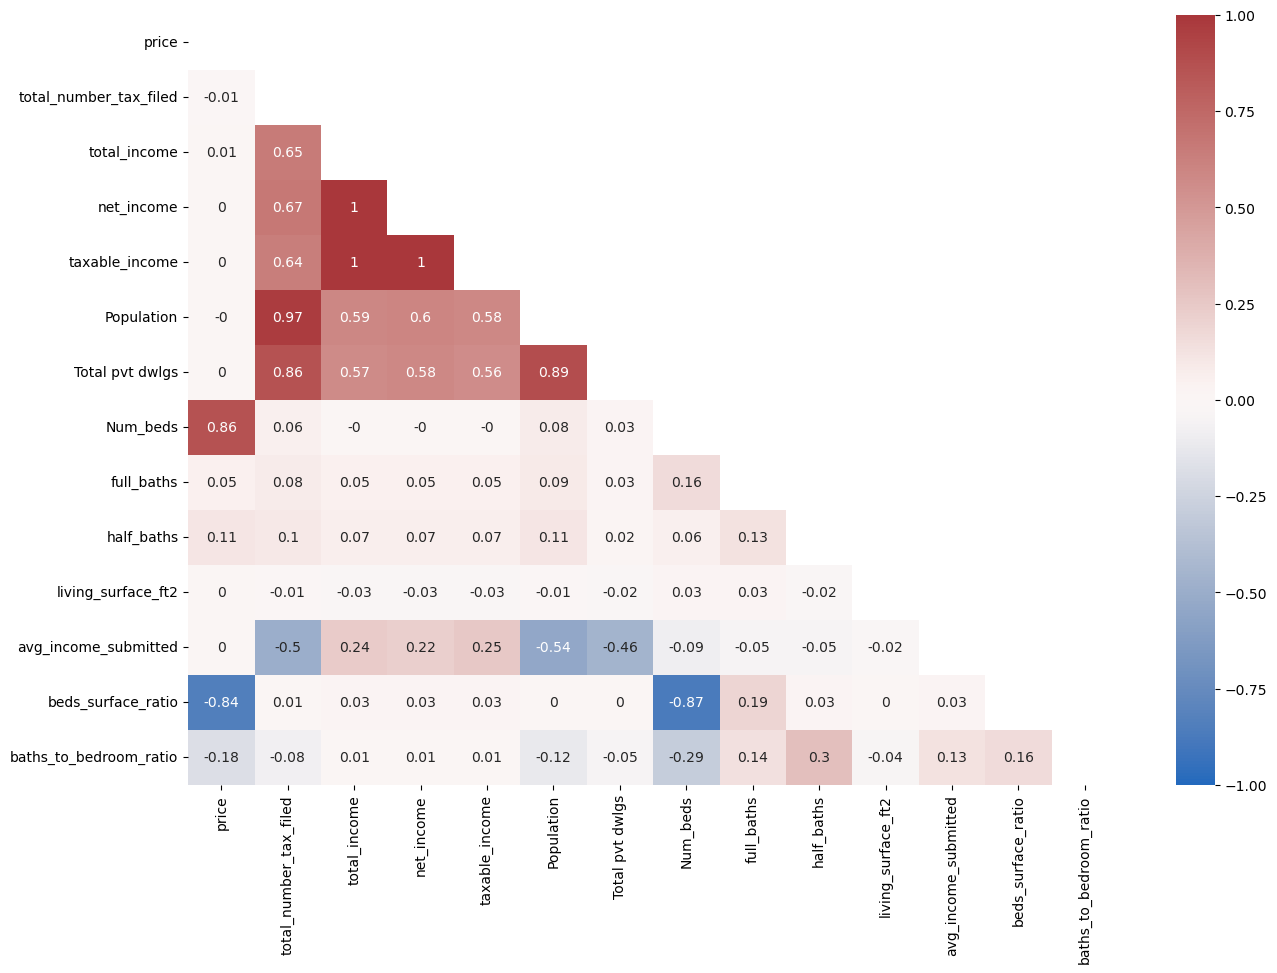

In [ ]:
import seaborn as sns

#calclate the correlation coefficient with precision of 1 decimal

corr_matrix =numerical_df.corr(method = 'pearson', min_periods=1).round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center =0, cmap='vlag',mask=mask)
plt.show()
